 # IMPORTING SOME BASIC LIBRARIES

In [1]:
import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (18,5)

import warnings 
warnings.filterwarnings('ignore')

import statsmodels 
import statsmodels.api as sm 

# IMPORT THE DATA

In [2]:
test = pd.read_csv(r'E:\skillvertex\Boston_Test.csv')
train = pd.read_csv(r'E:\skillvertex\Boston_Train.csv')

In [3]:
#dropping unnamed: 0 column 
train.drop('Unnamed: 0',axis=1,inplace=True)
train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#dropping unnamed: 0 column 
test.drop('Unnamed: 0',axis=1,inplace=True)
test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.07950,60,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,0.07244,60,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,0.01709,90,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
3,0.04301,80,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
4,0.10659,80,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6


## Data Description
### The Boston Housing Dataset
**The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:**

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq. ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centers
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dollar 
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [5]:
# Lets concate the train and test data 
Boston_data = pd.concat([train, test],ignore_index=True)

In [6]:
Boston_data.shape

(506, 14)

In [7]:
#check the data type 
Boston_data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

**"CHAS" is an dummy columns so while making model we have to consider this column as an categorical column.**

In [8]:
#null value check
Boston_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

# EXPLORATORY DATA ANALYSIS

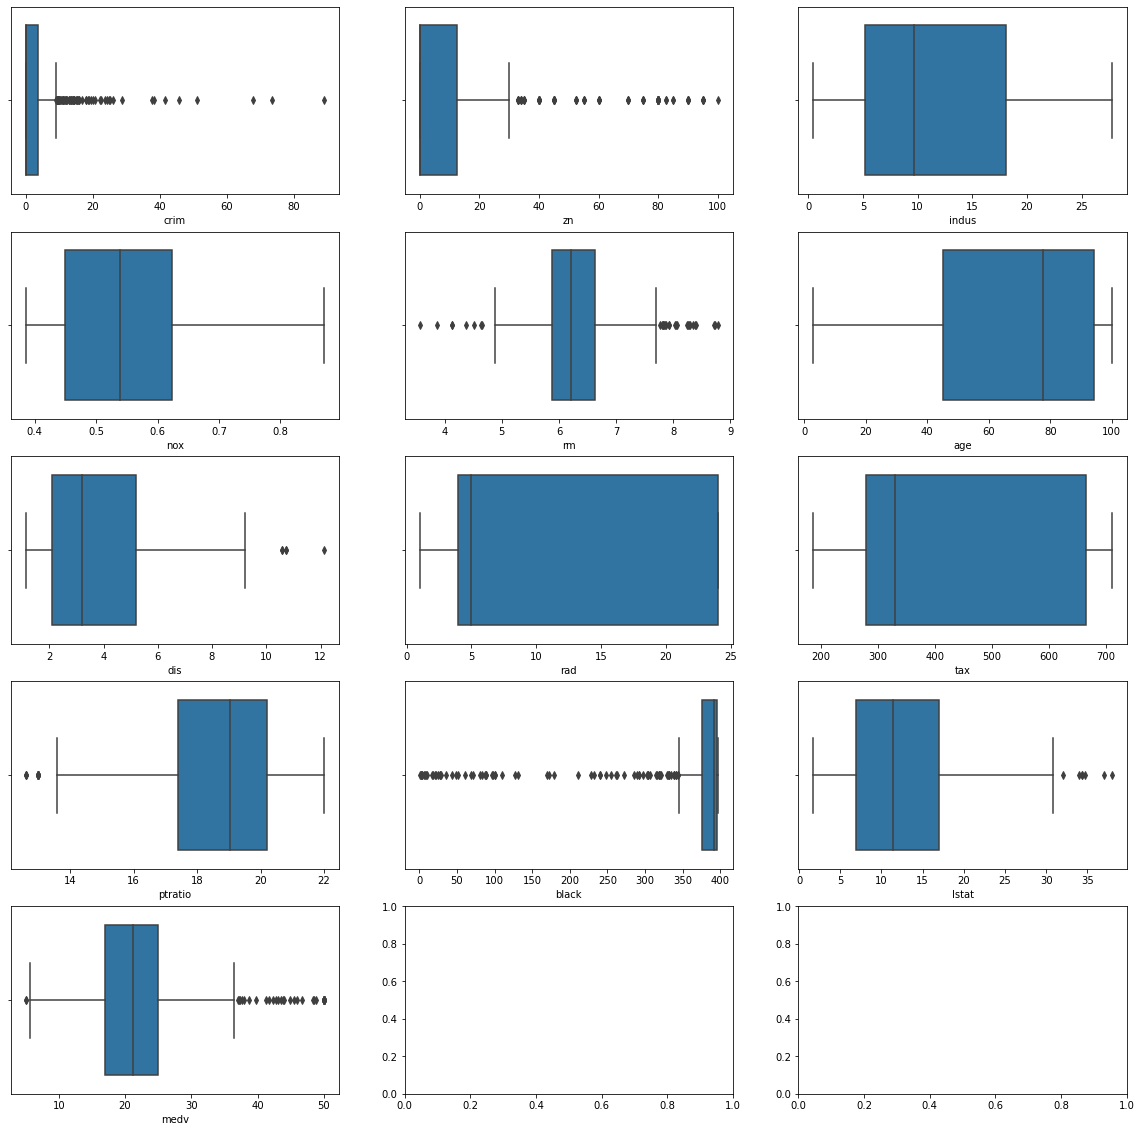

In [9]:
numerical_columns = ['crim','zn','indus','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']
fig, ax = plt.subplots(5,3, figsize = (20,20))
counter=0
for i in numerical_columns:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.boxplot(x=i,ax=ax[trace_x, trace_y],data=Boston_data) 
    plt.subplots_adjust(hspace=0.2)
    counter += 1
plt.show()

### Observation 
* There are some high outliers seen in attribute "crim" which cant be ignore. 

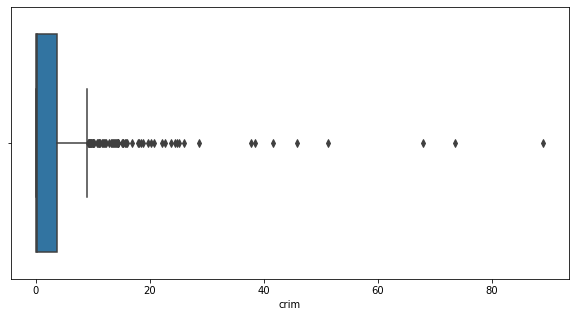

In [10]:
plt.figure(figsize=[10,5])
sns.boxplot(Boston_data.crim)
plt.show()

### Treating The Outliers

In [11]:
# lets cap the variable "crim"
Boston_data = Boston_data[~(Boston_data.crim>30)]

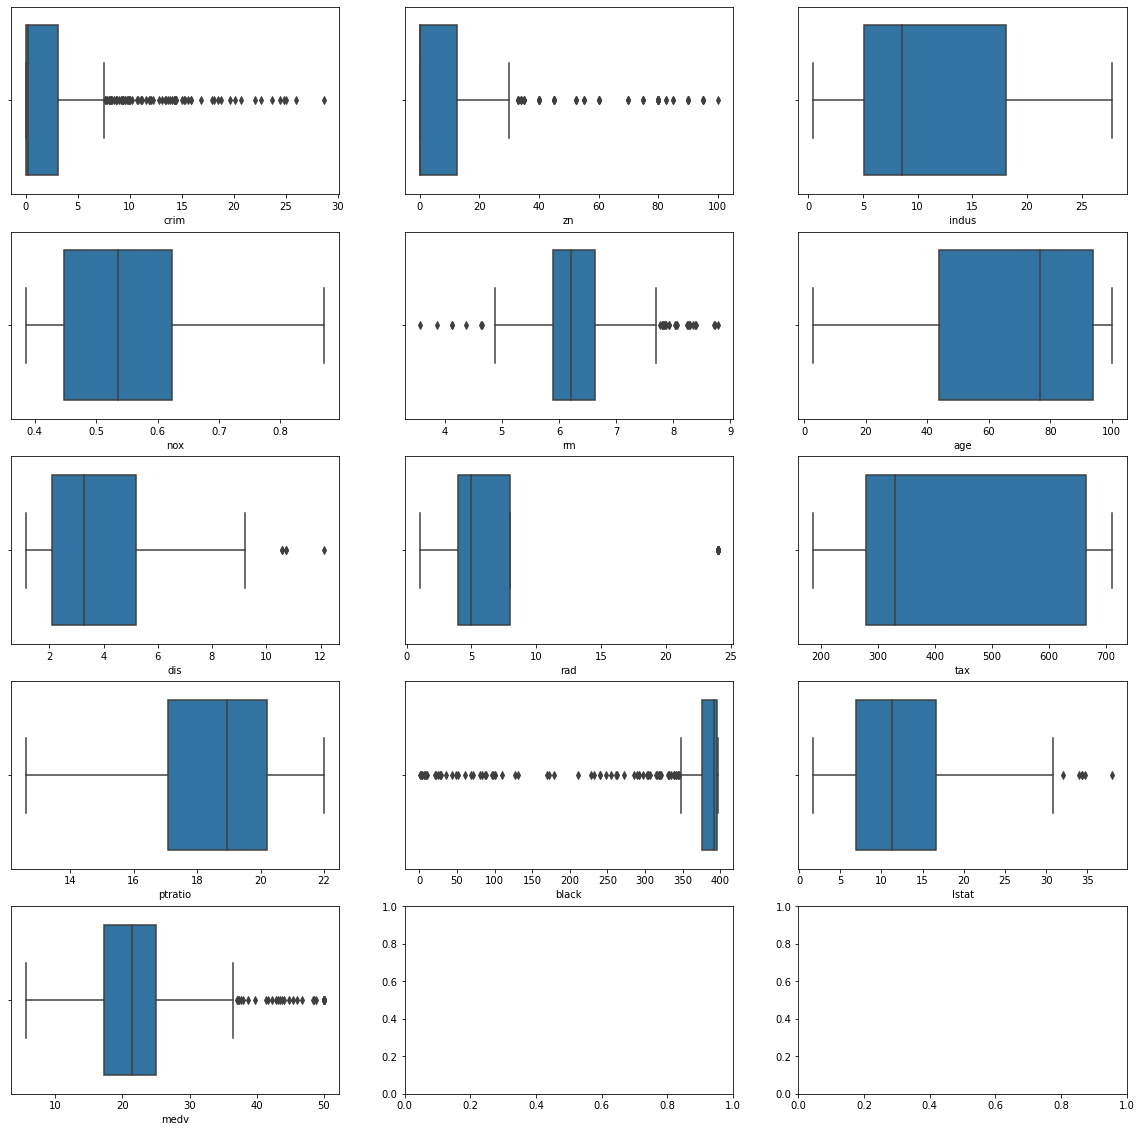

In [12]:
# lets again visualise the numirical data after capping 
numerical_columns = ['crim','zn','indus','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']
fig, ax = plt.subplots(5,3, figsize = (20,20))
counter=0
for i in numerical_columns:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.boxplot(x=i,ax=ax[trace_x, trace_y],data=Boston_data) 
    plt.subplots_adjust(hspace=0.2)
    counter += 1
plt.show()

***Now everything is good*** 

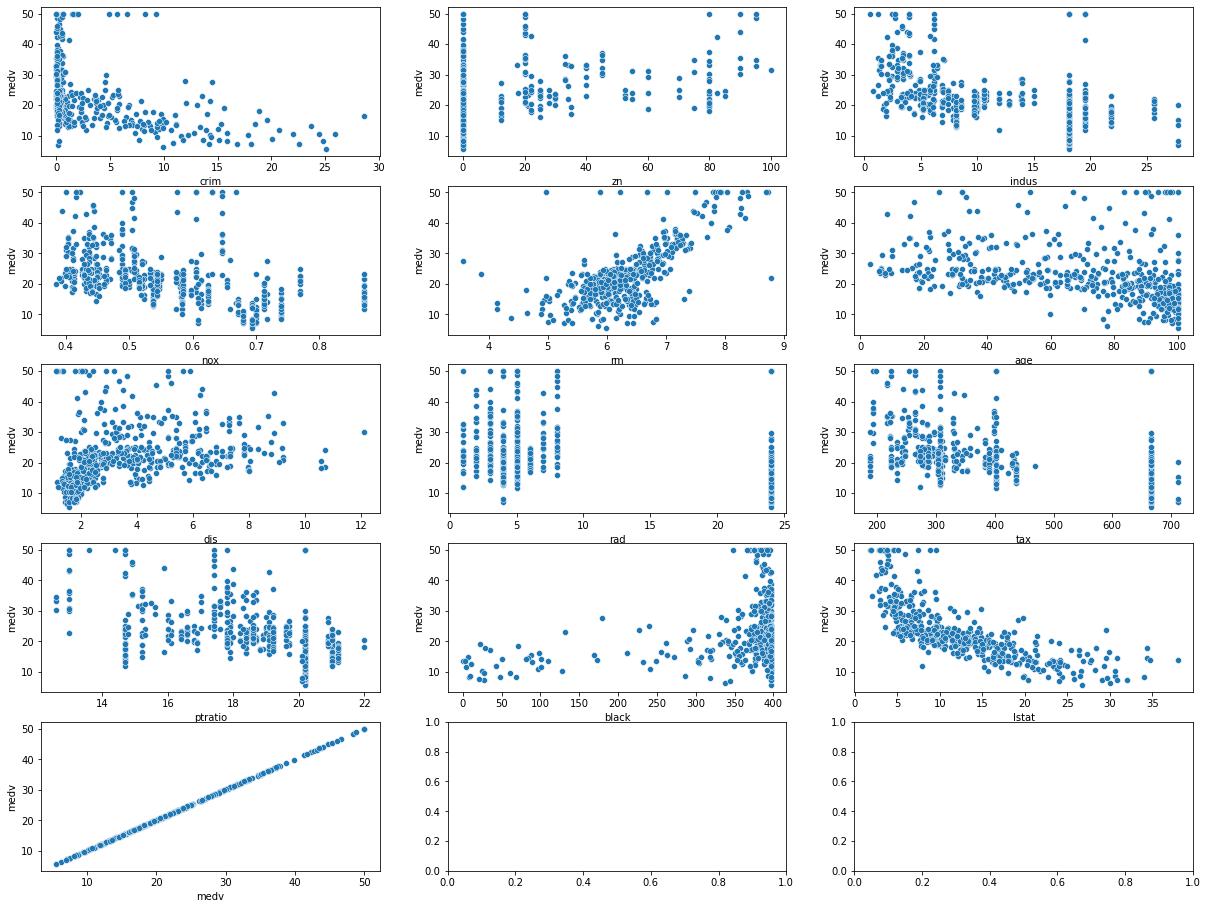

In [13]:
# Lets see how other variables are related to our target column "MEDV"
fig, ax = plt.subplots(5,3, figsize = (20,15))
counter=0
for i in numerical_columns:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.scatterplot(x=i,y='medv',ax=ax[trace_x, trace_y],data=Boston_data) 
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    counter += 1
plt.show()

### Observation 
**Some attributes which seem linearly correlated to the target column MEDV are**
* LSTAT - % lower status of the population 
* RM - the average number of rooms per dwelling 

**Where RM is positively correlated and LSTAT is negatively correlated**

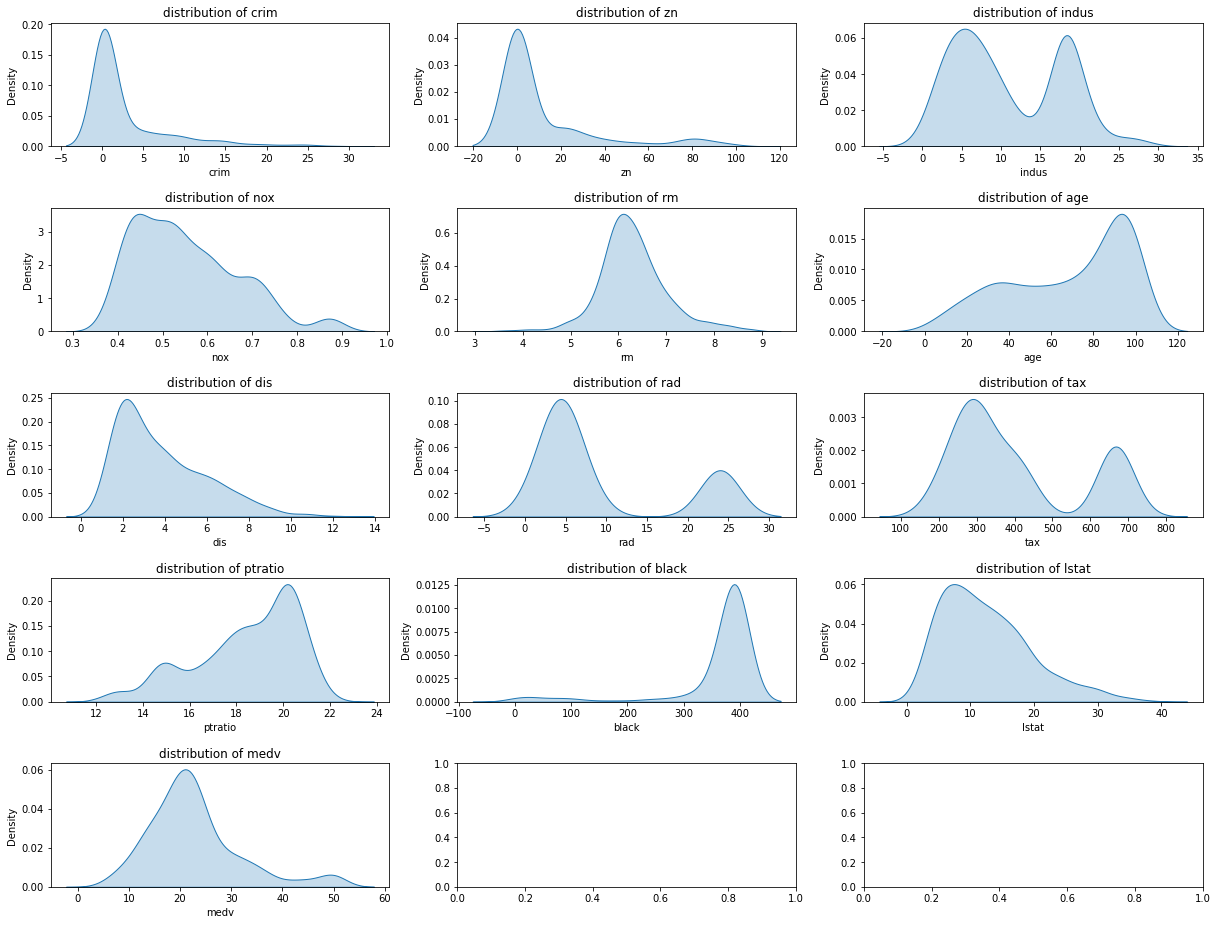

In [14]:
# Lets plot Kde plot for saw the distribution
fig, ax = plt.subplots(5,3, figsize = (20,15))
counter=0
for i in numerical_columns:
    trace_x = counter // 3
    trace_y = counter % 3
    chart=sns.kdeplot(x=i,ax=ax[trace_x, trace_y],data=Boston_data,shade=True) 
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
    chart.set(title = f'distribution of {i}')
    counter += 1
plt.show()

0    0.929719
1    0.070281
Name: chas, dtype: float64


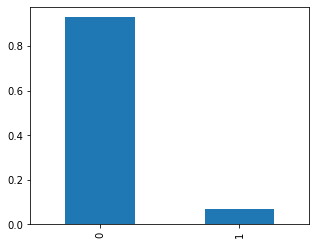

In [15]:
#Lets analyse the dummy column "CHAS"
print(Boston_data.chas.value_counts(normalize=True))
plt.figure(figsize=[5,4])
Boston_data.chas.value_counts(normalize=True).plot(kind='bar')
plt.show()

chas
0    22.32311
1    28.44000
Name: medv, dtype: float64


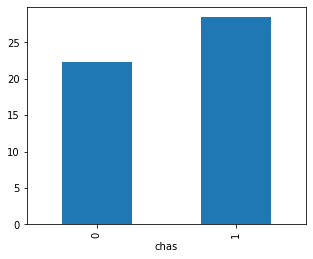

In [16]:
print(Boston_data.groupby(['chas'])['medv'].mean())
plt.figure(figsize=[5,4])
Boston_data.groupby(['chas'])['medv'].mean().plot(kind='bar')
plt.show()

### Observation 
* Attribute 'Chas' is highly imbalanced 
* The mean of house price is little high in case of Charles River. 

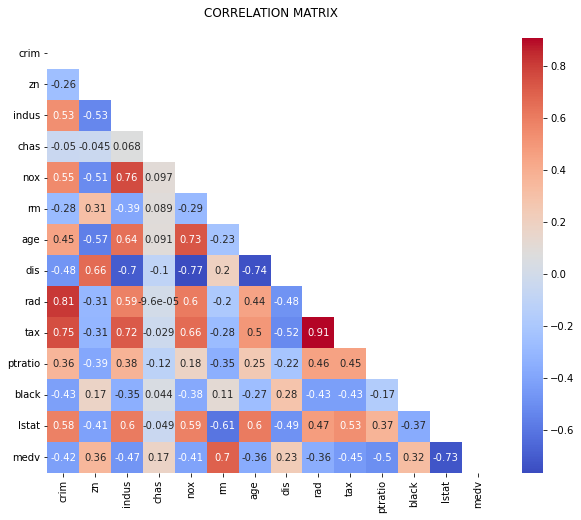

In [17]:
# Let's plot a heatmap to check the colinearity issue
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(Boston_data.corr())) 
sns.heatmap(Boston_data.corr(),cmap='coolwarm',annot=True,mask=mask) 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('CORRELATION MATRIX\n')
plt.show()

### Observation 
**Some highly correlated attributes are**  
* Attribute 'RAD' and 'TAX' has positively correlated with a value of 0.91 
* Attribute 'RAD' and 'CRIM' are also positively correlated with a value of 0.81 

* we have to drop "RAD" column due to multicolenearity issue

***And the dependent variable which is 'MEDV' is positively correlated with 'RM' with a value of 0.70 and negatively correlated with 'ISTAT' with a value of -0.73 its also negatively correlated with "CRIM", "INDUS", "NOX", "AGE" , "RAD","TAX" and "PTRATIO"***

In [18]:
# dropping "RED" column. 
Boston_data.drop("rad",axis=1,inplace=True)

# Model building

In [19]:
# now lets split the data into train and test set 
from sklearn.model_selection import train_test_split 
train,test = train_test_split(Boston_data,train_size=0.7,random_state=100) 

In [20]:
print(train.shape)
print(test.shape)

(348, 13)
(150, 13)


In [21]:
# lets scaled the numerical features
col = ['crim', 'zn', 'indus','nox', 'rm', 'age', 'dis', 'tax','ptratio', 'black', 'lstat', 'medv']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
train[col]=scaler.fit_transform(train[col])
train.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat,medv
84,-0.518143,-0.50307,-0.953931,0,-0.863888,0.096232,-0.669100,0.445394,-0.929133,0.053562,0.426327,-0.363759,0.074354
308,-0.425866,-0.50307,-0.140884,0,-0.040112,0.449577,0.545937,-0.261973,-0.581523,0.007424,0.426327,-1.089143,-0.045187
500,-0.481893,-0.50307,-0.172444,0,0.315412,-0.423731,0.447325,-0.658407,-0.050960,0.376526,0.426327,0.308792,-0.697224
126,-0.447899,-0.50307,2.226118,0,0.280726,-1.018384,1.007299,-1.016954,-1.288940,0.330388,-0.011273,2.155094,-0.816764
310,0.021034,-0.50307,-0.140884,0,-0.040112,-1.937656,-1.028329,-0.648149,-0.581523,0.007424,-0.114129,0.067473,-0.773295


In [22]:
# splitting X_train and y_train 
y_train = train.pop('medv')
X_train = train 

In [23]:
# lets use RFE(Recursive feature elimination ) and see what are the top 5 features from all those features.
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE 

lm=LinearRegression()  
lm.fit(X_train,y_train) 

rfe_top10 = RFE(lm,n_features_to_select=10)             
rfe_top10 = rfe_top10.fit(X_train, y_train) 

rfe_top5 = RFE(lm,n_features_to_select=5)             
rfe_top5 = rfe_top5.fit(X_train, y_train) 


print(f'top_5 attributes -> {X_train.columns[rfe_top5.support_].to_list()}')

top_5 attributes -> ['chas', 'rm', 'dis', 'ptratio', 'lstat']


In [24]:
imp_att = X_train.columns[rfe_top5.support_].to_list()
imp_att

['chas', 'rm', 'dis', 'ptratio', 'lstat']

# Hyper-Parameter Tuning

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [26]:
model_parameter ={

"Linear_Regression" :{
                        "model" : LinearRegression(),
                        "param" : {}
                       },

"Decision_Tree" :{
                        "model" : DecisionTreeRegressor(),
                        "param" : {'criterion' : [ "absolute_error","squared_error"]}
                 },

"SVM" : {
                        "model" : SVR(),
                        "param" : {'C' :[1.0],
                                   'kernel' : ['linear', 'poly', 'rbf'],
                                   'gamma': ['scale','auto']
                                  }
       },
    
    
"RandomForest" :{
                    "model" : RandomForestRegressor(),
                    "param" : {'criterion' : ["squared_error", "absolute_error"],
                            'n_estimators' : [85,100,110,105]
                              }
                      },
    
 "KNN" :{
                    "model" : KNeighborsRegressor(),
                    "param" : {}
                      },
"XGBRegressor" :{
                    "model" : XGBRegressor(),
                    "param" : {}
}
}

In [27]:
# Model Section 
from sklearn.model_selection import GridSearchCV
Scores = []
for model_name ,model_param in model_parameter.items():
    gs = GridSearchCV(model_param['model'],model_param['param'],cv = 5,return_train_score=False,scoring='r2')
    gs.fit(X_train,y_train)
    Scores.append({'Model': model_name,
                 'Best_Score' : gs.best_score_,
                 'Best_Parameter' : gs.best_params_})

Model_Report = pd.DataFrame(Scores,columns=['Model','Best_Score','Best_Parameter'])
Model_Report.sort_values(by='Best_Score',ascending=False)

,Model,Best_Score,Best_Parameter
5,XGBRegressor,0.853151,{}
3,RandomForest,0.849035,"{'criterion': 'squared_error', 'n_estimators':..."
2,SVM,0.807856,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}"
4,KNN,0.758585,{}
1,Decision_Tree,0.712683,{'criterion': 'squared_error'}
0,Linear_Regression,0.658515,{}


## Random Forest and XGBRegressor are having highest R-squared 

In [28]:
# lets go with RandomForest Regressor 
# Checking the best parameter
Model_Report.iloc[3,2]

{'criterion': 'squared_error', 'n_estimators': 105}

# Final Model

In [29]:
# make RandomForest class 
reg = RandomForestRegressor(criterion='squared_error', n_estimators= 105,random_state=42)

# fit the model with only the top 5 features acccording to RFE 
X_train = X_train[imp_att]
reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=105, random_state=42)

In [30]:
# lets predict 
y_train_pred = reg.predict(X_train)

In [31]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

# Model Evaluation
print('R-Squared:',r2_score(y_train, y_train_pred))

print('Adjusted R^2:',1 - (1-r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

print('MSE:',mean_squared_error(y_train, y_train_pred))

print('RMSE:',np.sqrt(mean_squared_error(y_train, y_train_pred))) 



R-Squared: 0.9774547904402869
Adjusted R^2: 0.9771251821133905
MSE: 0.022545209559713113
RMSE: 0.1501506229081755


In [32]:
def VIF(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor 
    Vif={} 
    count=0
    for i in X.columns:
        Vif[i] = round(variance_inflation_factor(X.values  , count) ,2)
        count+=1
    Vif = pd.DataFrame(list(Vif.items()),columns=['Features','VIF']).sort_values('VIF',ascending=False) 
    return Vif 

print(VIF(X_train))

  Features   VIF
4    lstat  1.97
1       rm  1.66
2      dis  1.35
3  ptratio  1.19
0     chas  1.03


# Residual analysis and validating the assumptions

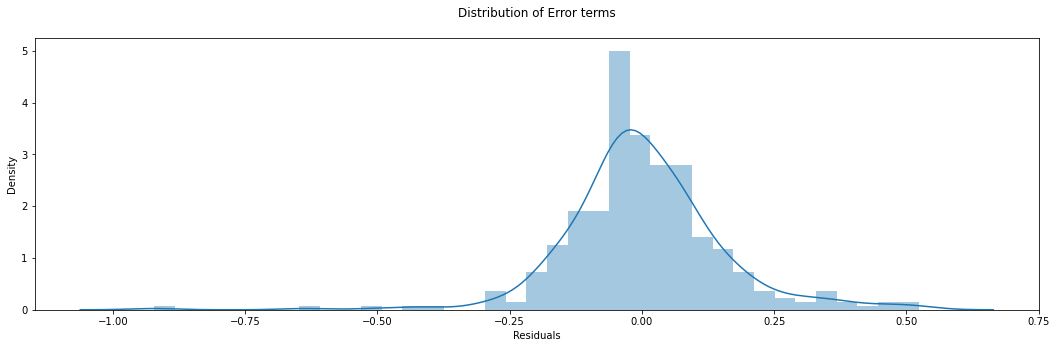

In [33]:
res = y_train - y_train_pred 
sns.distplot(res) 
plt.title('Distribution of Error terms\n') 
plt.xlabel('Residuals')
plt.show() 

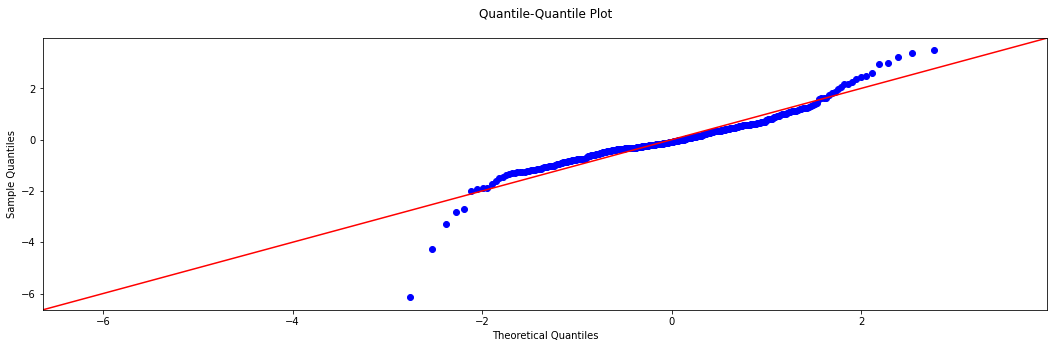

In [34]:
# also plot a Q-Q plot
sm.qqplot(res,line='45',fit=True) 
plt.title('Quantile-Quantile Plot\n')
plt.show()

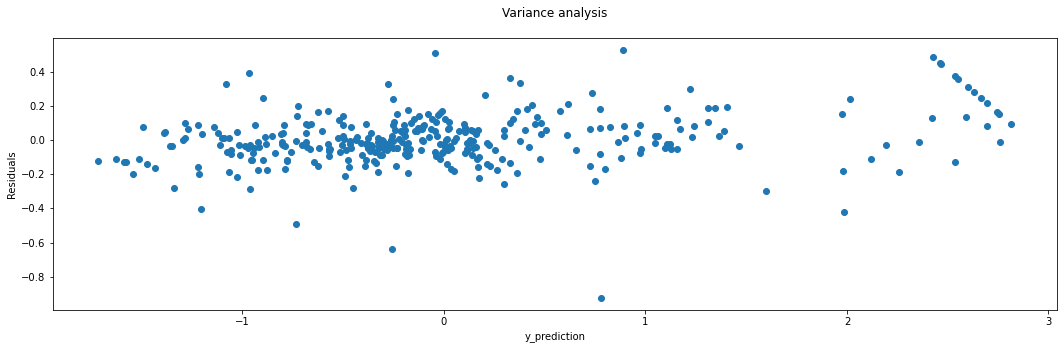

In [35]:
plt.scatter( y_train_pred, res) 
plt.title('Variance analysis\n')
plt.ylabel('Residuals') 
plt.xlabel('y_prediction')
plt.show()

* Error terms are normally distributed with mean approximately zero .
* By observing the Q-Q plot we can clearly see that most of the points are in the line so residuals are normally distributed .
* Error terms have constant variance because the points are randomly scattered ; there is no such pattern .

# Test the model on testing set

In [36]:
test[col]=scaler.transform(test[col])
test.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat,medv
103,-0.484556,-0.503070,-0.342267,0,-0.248224,-0.265731,0.718507,-0.553649,-0.093649,1.160867,0.398054,0.181707,-0.425542
136,-0.461397,-0.503070,1.661043,0,0.653593,-0.545822,0.933340,-0.915486,0.229567,1.299280,0.209330,0.675768,-0.632020
140,-0.468017,-0.503070,1.661043,0,0.653593,-0.212586,0.936862,-1.087260,0.229567,1.299280,0.323705,1.712439,-1.001508
467,0.393739,-0.503070,1.091460,0,0.306740,-0.458203,0.968559,-0.638036,1.626105,0.837903,-0.337060,1.306909,-0.447277
353,-0.525131,3.301847,-1.325137,0,-1.202069,0.583159,-1.088200,4.000425,-1.295038,-0.638503,0.281585,-1.094854,0.748126


In [37]:
# splitting X_train and y_train 
y_test = test.pop('medv')
X_test = test 

In [38]:
y_test_pred = reg.predict(X_test[imp_att])

In [39]:
print('R-Squared:',r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test[imp_att].shape[1]-1))
print('MSE:',mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred))) 

R-Squared: 0.9002978076037012
Adjusted R^2: 0.8968359259232741
MSE: 0.08946214118501547
RMSE: 0.2991022253093672


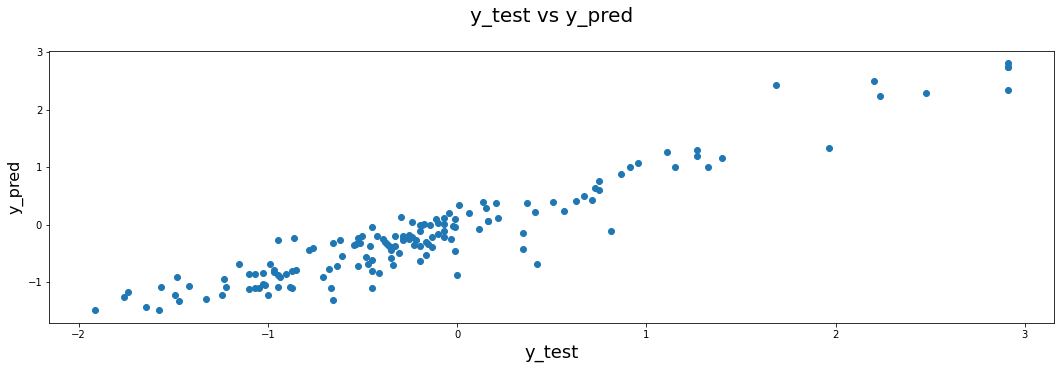

In [40]:
plt.scatter(y_test,y_test_pred) 
plt.title('y_test vs y_pred\n', fontsize=20)         
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 
plt.show()

# FINAL Inference 
* In Prediction the difference between R-Squared and Adjusted R-Squared was so low that means there are no model complexity issues  
* Also the VIF value is less than 2 for all the features so that means there are no multicollinearity issues 


***Top 5 crucial features are***

* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* RM - the average number of rooms per dwelling
* DIS - weighted distances to five Boston employment centers
* PTRATIO - pupil-teacher ratio by town
* LSTAT - % lower status of the population

***where PTRATIO and LSTAT are negatively impacting the house price and CHAS, RM, and DIS are positively impacting***